In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_palette("husl")

In [ ]:
df_iris = sns.load_dataset("iris") 
print(df_iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
X = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] #Predictor
y = df_iris[['species']] # Respuesta

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
results = lda.fit_transform(X,y)

In [ ]:
df_lda = pd.DataFrame(results)
df_lda['label'] = y
df_lda.columns=["LD1","LD2","label"]
df_lda

,LD1,LD2,label
0,8.061800,0.300421,setosa
1,7.128688,-0.786660,setosa
2,7.489828,-0.265384,setosa
3,6.813201,-0.670631,setosa
4,8.132309,0.514463,setosa
...,...,...,...
145,-5.645003,1.677717,virginica
146,-5.179565,-0.363475,virginica
147,-4.967741,0.821141,virginica
148,-5.886145,2.345091,virginica


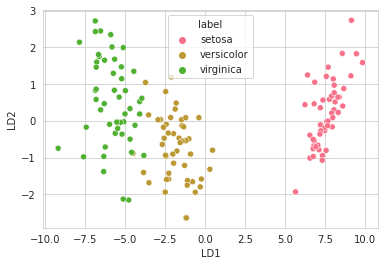

In [ ]:
sns.scatterplot(data=df_lda,x='LD1' ,y='LD2',hue='label')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size= 0.3, random_state=42) 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

crossvalidation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=crossvalidation)
print(np.mean(scores))

0.9678787878787877


In [ ]:
lda_predict = lda.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,lda_predict))
print(classification_report(y_test,lda_predict))

[[19  0  0]
 [ 0 13  0]
 [ 0 13  0]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.50      1.00      0.67        13
   virginica       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45

